In [1]:
import numpy as np

from qiskit import QuantumCircuit

from qiskit.quantum_info import SparsePauliOp, Statevector
from qiskit.circuit.library import RealAmplitudes, UnitaryGate
from qiskit.visualization import plot_histogram, plot_state_city

import matplotlib.pyplot as plt

In [2]:
def reference_preperation(num_qubits, i, unitary_matrix):
    """
    Prepare the i-th reference state for SSVQE     
    """
    u_gate = UnitaryGate(unitary_matrix)

    reference_circuit = QuantumCircuit(num_qubits)

    binary_index = np.binary_repr(i, num_qubits)
    for j in range(num_qubits):
        if binary_index[-j-1] == '1':
            reference_circuit.x(j)

    reference_circuit.append(u_gate, list(range(num_qubits)))
    
    return reference_circuit

In [3]:
'''
initial_guess = np.asarray([[ 1,  0,  0,  0],
                            [ 0,  1,  0,  0],
                            [ 0,  0,  1,  0],
                            [ 0,  0,  0,  1]])
'''
initial_guess = 0.5 * np.asarray([[ 1,  1,  1,  1],
                                  [ 1,  1, -1, -1],
                                  [ 1, -1, -1,  1],
                                  [ 1, -1,  1, -1]])

var_form = RealAmplitudes(num_qubits=2, entanglement='linear', reps=2, insert_barriers=True)

ansatz_list = []
for index in range(4):
    ansatz = reference_preperation(num_qubits=2, i=index, unitary_matrix=initial_guess).compose(var_form)
    ansatz_list.append(ansatz)

In [9]:
qc_list = []

final_parameters = [-0.102094,    0.06497853, -0.00963852,  0.31013179,  0.1030265,  -0.03964272]

for i in range(4):
    qc_list.append(ansatz_list[i].assign_parameters(final_parameters))

/tmp/ipykernel_14184/1111894173.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  values = list(map(float, Statevector(qc_list[0])))


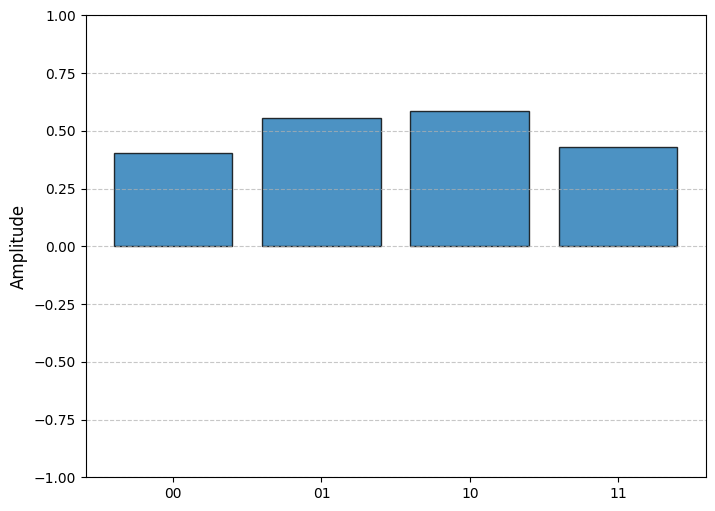

In [10]:
categories = ['00', '01', '10', '11']
values = list(map(float, Statevector(qc_list[0])))

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, values, alpha=0.8, edgecolor='black')

# Add titles and labels
plt.ylabel("Amplitude", fontsize=12)
plt.ylim((-1, 1))

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipykernel_14184/3365480310.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  values = list(map(float, Statevector(qc_list[1])))


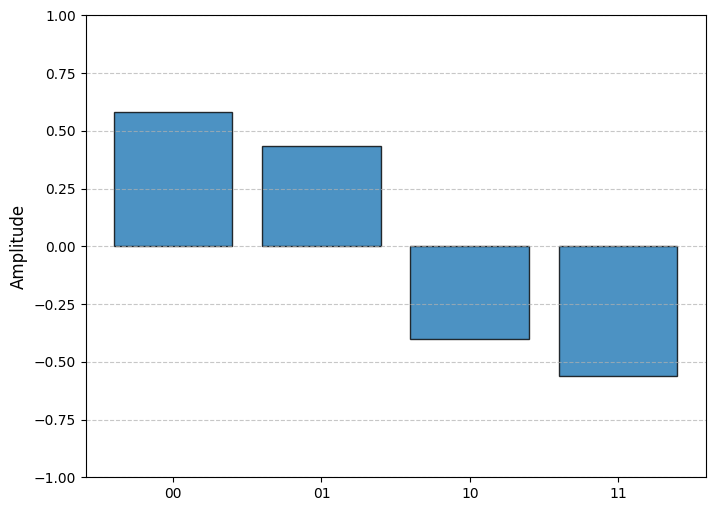

In [11]:
categories = ['00', '01', '10', '11']
values = list(map(float, Statevector(qc_list[1])))

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, values, alpha=0.8, edgecolor='black')

# Add titles and labels
plt.ylabel("Amplitude", fontsize=12)
plt.ylim((-1, 1))

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipykernel_14184/59587895.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  values = list(map(float, Statevector(qc_list[2])))


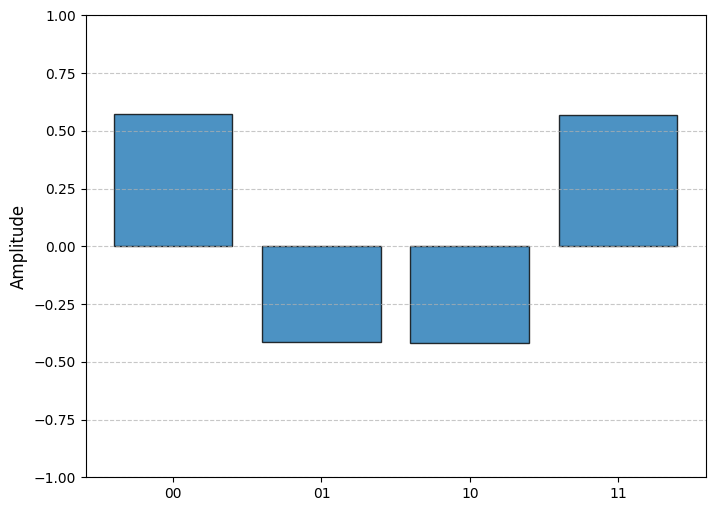

In [12]:
categories = ['00', '01', '10', '11']
values = list(map(float, Statevector(qc_list[2])))

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, values, alpha=0.8, edgecolor='black')

# Add titles and labels
plt.ylabel("Amplitude", fontsize=12)
plt.ylim((-1, 1))

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipykernel_14184/3905511594.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  values = list(map(float, Statevector(qc_list[3])))


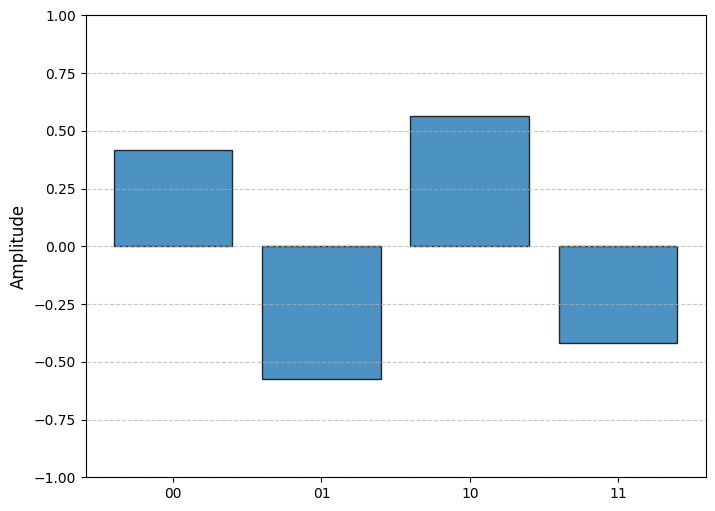

In [13]:
categories = ['00', '01', '10', '11']
values = list(map(float, Statevector(qc_list[3])))

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, values, alpha=0.8, edgecolor='black')

# Add titles and labels
plt.ylabel("Amplitude", fontsize=12)
plt.ylim((-1, 1))

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()